## 3B - L3 stereo correspondence

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import correlate

#### Load the images

In [2]:
left = Image.open("data/flowers-left.png")
right = Image.open("data/flowers-right.png")

In [3]:
# print their sizes
left.size, right.size

((1920, 1080), (1920, 1080))

In [4]:
# convert the images to grayscale 
left = left.convert("L")
right = right.convert("L")

# convert images to a numpy array and normalize them
left_arr = np.array(left, dtype=np.float32) / 255.0
right_arr = np.array(right, dtype=np.float32) / 255.0

In [5]:
# crop the images to remove the white border
bx = 200# approx border width x
by = 20# approx border width y
h, w = left_arr.shape
left_arr = left_arr[by:w-by, bx:w-bx]
right_arr = right_arr[by:w-by, bx:w-bx]

In [6]:
left_arr.shape, right_arr.shape

((1060, 1520), (1060, 1520))

#### plot the reference point in the left view

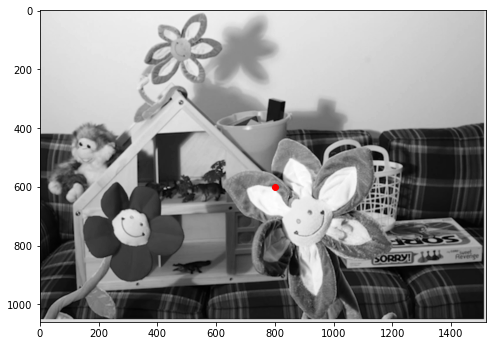

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

ref_point = np.array([800, 600])

ax.imshow(left_arr, cmap="gray")
ax.scatter(*ref_point, color="red")

#### find the correspondence of the reference point in the right view

In [8]:
def compute_stereo_correspondence(left, right, ref_point, window_size):
    '''
    find the correspondence point in the right view. It assumes the epipolar lines are
    parallel, horizontal, and are at the same height.
        
    Parameters
    ----------
    left: np.ndarray, shape: (h, w) 
        grayscale normalized version of the left view
    right: np.ndarray, shape: (h, w) 
        grayscale normalized version of the right view.
        It has the same shape as the left view.
    ref_point: np.ndarray
        The reference pixel in the left view.
    window_size: int
        the size of the side of the square window
        
    Returns
    --------
    scores: list
        a list containing the scores at each position along the epipolar line in the right view
    c_point: np.ndarray
        the correspondence point computed based on the best score
    '''
    
    # check if both the views have the same shape
    assert left.shape == right.shape
    
    h, w = left.shape
    x, y = ref_point
    b = window_size//2
    
    # check if the reference point is not at the extremes
    assert x - b >= 0
    assert x + b < w
    assert y - b >= 0
    assert y + b < h
    
    # the patch in the left view we want to find the correspondence
    reference_window = left[y - b: y + b, x - b: x + b] # y comes first!
        
    scores = []
    score_max = float("-inf")
    xmin = 0
    for xi in range(b, w-b):
        patch = right[y-b:y+b, xi-b:xi+b]
        score = correlate(reference_window, patch, mode="valid", method="direct").flatten()[0]
        if score > score_max:
            xmin = xi
            score_max = score
        scores.append(score)
    
    c_point = np.array([xmin, y]) # correspondence_point
    
    return scores, c_point

In [9]:
scores, c_point = compute_stereo_correspondence(left_arr, right_arr, ref_point, 200)

Text(0.5, 0, 'x`')

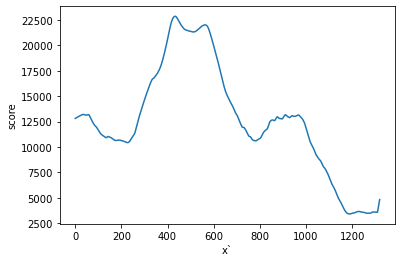

In [10]:
plt.plot(scores)
plt.ylabel("score")
plt.xlabel("x`")

#### plot the correspondence point in the right image

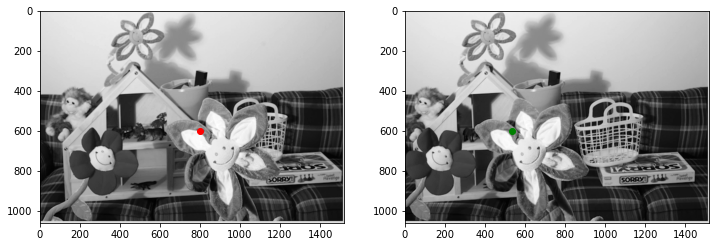

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].imshow(left_arr, cmap="gray")
ax[0].scatter(*ref_point, color="red")

ax[1].imshow(right_arr, cmap="gray")
ax[1].scatter(*c_point, color="green")

great!

Observation:
1. the reference point needs to be chosen very carefully so that it's unique
2. The larger the window size, the more accurate is the correspondence. however, it's less precise.